<a href="https://colab.research.google.com/github/hasnafd/hasnafd/blob/main/Project_Akhir_Rakamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#Memasukkan packages yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore') 

In [114]:
#Memasukkan data
data = pd.read_csv('/content/application_train.csv')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Preprocessing**

In [115]:
#Melihat info tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [116]:
#Remove kolom yang tidak diperlukan
data = data.drop(["SK_ID_CURR","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","NAME_CONTRACT_TYPE","CNT_CHILDREN","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","HOUR_APPR_PROCESS_START","WEEKDAY_APPR_PROCESS_START","OCCUPATION_TYPE","ORGANIZATION_TYPE","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG","ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE","APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE","TOTALAREA_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1)

In [117]:
#Cek Missing Value
data.isnull().sum()

TARGET                              0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
dtype: int64

In [118]:
#Menangani Missing Value
data.dropna()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,2,2
6,0,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,-619,17.0,3.0,2,2
7,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,-2379,8.0,2.0,3,3
13,0,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,-643.0,-4911,23.0,3.0,2,2
15,0,157500.0,299772.0,20160.0,247500.0,0.020713,-8728,-1157,-3494.0,-1368,17.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,0,585000.0,1575000.0,43443.0,1575000.0,0.028663,-20965,-1618,-1764.0,-4410,2.0,2.0,2,2
307494,0,270000.0,479700.0,46858.5,450000.0,0.035792,-14958,-6573,-1438.0,-4519,15.0,3.0,2,2
307495,0,180000.0,808650.0,23773.5,675000.0,0.025164,-20922,-7438,-9596.0,-4440,2.0,2.0,2,2
307497,0,180000.0,270126.0,12028.5,193500.0,0.007020,-16679,-1222,-1916.0,-222,0.0,2.0,2,2


In [119]:
data.mode()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,135000.0,450000.0,9000.0,450000.0,0.035792,-13749,365243,-1.0,-4053,7.0,2.0,2,2


In [120]:
for column in data:
  data[column].fillna(data[column].mode()[0], inplace=True)
data.tail()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,7.0,1.0,1,1
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,7.0,1.0,2,2
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,7.0,1.0,3,3
307509,1,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,7.0,2.0,2,2
307510,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,-5128.0,-410,7.0,2.0,1,1


In [121]:
#Mengecek kembali null pada data
data.isnull().sum()

TARGET                         0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
dtype: int64

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   AMT_INCOME_TOTAL             307511 non-null  float64
 2   AMT_CREDIT                   307511 non-null  float64
 3   AMT_ANNUITY                  307511 non-null  float64
 4   AMT_GOODS_PRICE              307511 non-null  float64
 5   REGION_POPULATION_RELATIVE   307511 non-null  float64
 6   DAYS_BIRTH                   307511 non-null  int64  
 7   DAYS_EMPLOYED                307511 non-null  int64  
 8   DAYS_REGISTRATION            307511 non-null  float64
 9   DAYS_ID_PUBLISH              307511 non-null  int64  
 10  OWN_CAR_AGE                  307511 non-null  float64
 11  CNT_FAM_MEMBERS              307511 non-null  float64
 12  REGION_RATING_CLIENT         307511 non-null  int64  
 13 

**PREPROCESSING**

In [123]:
#Preprocessing pada data tanpa tuning
X = pd.DataFrame(data.drop(["TARGET"],axis=1), columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'])
X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,7.0,1.0,2,2
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,7.0,2.0,1,1
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,2,2
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,7.0,2.0,2,2
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,7.0,1.0,2,2


In [124]:
#Mendeskripsikan variabel y
y = data['TARGET']
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [125]:
#Memisahkan data train dan data testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [126]:
#Melakukan pengujian KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [127]:
#Melakukan knn predict untuk data x test
y_pred = knn.predict(X_test)

In [132]:
#Memberi info mengenai klasifikasi dan pembandingan antara data tes dan prediksi
confusion_matrix(y_test, y_pred)

#menghitung tabulasi silang beberapa faktor
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,70209,578,70787
1,5990,101,6091
All,76199,679,76878


In [ ]:
#Hasil klasifikasi
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     70787
           1       0.15      0.02      0.03      6091

    accuracy                           0.91     76878
   macro avg       0.54      0.50      0.49     76878
weighted avg       0.86      0.91      0.88     76878



**Preprocessing data dan processing data dengan tuning**

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
#Preprocessing pada data dengan tuning
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(["TARGET"],axis = 1)), columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'])
X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0.142129,-0.478095,-0.166096,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,-0.233643,-1.265722,-0.103064,-0.062699
1,0.426792,1.725450,0.592708,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,-0.233643,-0.167638,-2.067573,-2.051813
2,-0.427196,-1.152888,-1.404584,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,2.345442,-1.265722,-0.103064,-0.062699
3,-0.142533,-0.711430,0.177912,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,-0.233643,-0.167638,-0.103064,-0.062699
4,-0.199466,-0.213734,-0.361695,-0.068554,0.563570,-0.892535,-0.473210,0.191639,-0.307263,-0.233643,-1.265722,-0.103064,-0.062699


In [ ]:
#Memisahkan data train dan data testing
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Melakukan pengujian KNN
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_Train, y_Train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#Melakukan knn predict untuk data x Test
y_Pred = knn.predict(X_Test)

In [ ]:
#Memberi info mengenai klasifikasi, pembandingan antara data tes dan prediksi
confusion_matrix(y_Test,y_Pred)
#Menghitung tabulasi silang beberapa faktor
pd.crosstab(y_Test,y_Pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,70225,562,70787
1,5986,105,6091
All,76211,667,76878


In [ ]:
#Hasil Klasifikasi
print(classification_report(y_Test,y_Pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     70787
           1       0.16      0.02      0.03      6091

    accuracy                           0.91     76878
   macro avg       0.54      0.50      0.49     76878
weighted avg       0.86      0.91      0.88     76878



Data Visualization

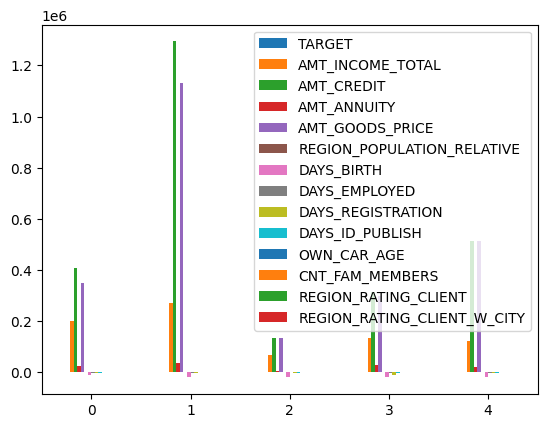

In [135]:
headata = data.head()
barplot = headata.plot.bar(rot=0)

In [137]:
headata.style.background_gradient()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,1,202500.000000,406597.500000,24700.500000,351000.000000,0.018801,-9461,-637,-3648.000000,-2120,7.000000,1.000000,2,2
1,0,270000.000000,1293502.500000,35698.500000,1129500.000000,0.003541,-16765,-1188,-1186.000000,-291,7.000000,2.000000,1,1
2,0,67500.000000,135000.000000,6750.000000,135000.000000,0.010032,-19046,-225,-4260.000000,-2531,26.000000,1.000000,2,2
3,0,135000.000000,312682.500000,29686.500000,297000.000000,0.008019,-19005,-3039,-9833.000000,-2437,7.000000,2.000000,2,2
4,0,121500.000000,513000.000000,21865.500000,513000.000000,0.028663,-19932,-3038,-4311.000000,-3458,7.000000,1.000000,2,2
